# Frozen Lake

Applying the technique demonstrated in q_learning.ipynb to the Frozen Lake environment.  
(https://www.gymlibrary.ml/environments/toy_text/frozen_lake/)

In [35]:
import gym
import numpy as np
import pandas as pd

from qlearn import DiscreteQTable, DeepQTableSeq, plot_rewards, basic_training, run_episode

Create a new enviroment, reset and show the state:

In [36]:
lake_env = gym.make('FrozenLake-v1', is_slippery=False) #Standard: 'FrozenLake-v1', desc=None,map_name="4x4", is_slippery=True
lake_env.reset() 
lake_env.render()

print('\nAction Space: {}'.format(lake_env.action_space))
print('Observation Space: {}'.format(lake_env.observation_space))



SFFF
FHFH
FFFH
HFFG

Action Space: Discrete(4)
Observation Space: Discrete(16)


Move the agent and print new state

In [37]:
new_state, reward, done, info = lake_env.step(1) # 0:LEFT, 1:DOWN, 2: RIGHT, 3: UP
lake_env.render()
print ('new_state:', new_state, '  reward:', reward, '  done:', done, '  prob:', info) # done:true:hole

  (Down)
SFFF
FHFH
FFFH
HFFG
new_state: 4   reward: 0.0   done: False   prob: {'prob': 1.0}


In [38]:
new_state, reward, done, info = lake_env.step(2)
lake_env.render()
print ('new_state:', new_state, '  reward:', reward, '  done:', done, '  prob:', info)

  (Right)
SFFF
FHFH
FFFH
HFFG
new_state: 5   reward: 0.0   done: True   prob: {'prob': 1.0}


In [39]:
new_state, reward, done, info = lake_env.step(2)
lake_env.render()
print ('new_state:', new_state, '  reward:', reward, '  done:', done, '  prob:', info)

  (Right)
SFFF
FHFH
FFFH
HFFG
new_state: 5   reward: 0   done: True   prob: {'prob': 1.0}


if agent in a hole, done = True,  reset again and reiniciate

In [40]:
lake_env = gym.make('FrozenLake-v1', is_slippery=True) #This time we will consider is_slippery=True
lake_env.reset() 
lake_env.render()


SFFF
FHFH
FFFH
HFFG


Randomly run episodes and learning:

In [41]:
result = run_episode(lake_env, frames='ansi')
print('Random agent reward {} in {} steps'.format(result.reward, len(result.frames)))

Random agent reward 0.0 in 18 steps


In [42]:
import time
from IPython import display

for frame in result.frames:
    display.clear_output(wait=True)
    print(frame)
    time.sleep(0.1)

  (Right)
SFFF
FHFH
FFFH
HFFG



In [43]:
print (result.frames[1])
print (result.frames[2])
print (result.frames[3])

  (Down)
SFFF
FHFH
FFFH
HFFG

  (Up)
SFFF
FHFH
FFFH
HFFG

  (Right)
SFFF
FHFH
FFFH
HFFG



Since the agent get the reward only in the end, the model will have difficulty with learning.   
In this case, exploration (random moves) is crucial, but we need to change the reward in order to influence the behaviour of the learning (e.g. assigning scores for not falling into the holes).   
We also will change some parameters in the model for balancing exploration vs. exploitation.   

The FrozenLake environment is highly stochastic, with a very sparse reward: only when the agent reaches the goal, a reward of +1 is obtained. This means that if we do not set a discount rate, the agent can keep on wandering around without receiving a learning “signal” that can be propagated back through the preceding state-actions (since falling into the holes does not result in a negative reward) and thus learns very slowly. Some parameter will be configurated to help converging and improve learning: gamma, alpha and epsilon.

In [125]:
# Table to include the results
df_results = pd.DataFrame(columns = ['variable', 'value', 'Average reward'])

In [295]:
# Restart
lake_env = gym.make('FrozenLake-v1', is_slippery=True) #This time we will consider is_slippery=True
lake_env.reset() 
lake_env.render()

qtable = DiscreteQTable(lake_env)


SFFF
FHFH
FFFH
HFFG


In [296]:
# --HYPERPARAMETERS--
total_episodes = 1000	    # Total episodes 1000
alpha = 0.3 		        # Learning rate, not too high, not too low 0.6
gamma = 0.85 				# Discounting rate 0.99

# Exploration parameters
epsilon = 1.0 				# Exploration rate 1
epsilon_min = 0.00001		# Min exploration probability 0.00001
epsilon_decay = 0.2		    # Exponential decay rate for exploration probability 0.2

<AxesSubplot:xlabel='Episode', ylabel='Total Reward'>

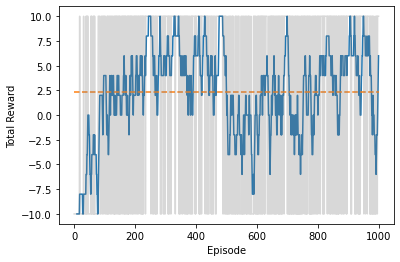

In [297]:
plot_rewards(basic_training(lake_env, qtable, episodes=total_episodes, alpha=alpha, gamma=gamma, epsilon=epsilon, epsilon_decay=epsilon_decay, epsilon_min=epsilon_min))
#standard: alpha=0.1, gamma=0.6, epsilon=0.1, epsilon_decay=0, epsilon_min=0.01, verbose: bool=False

Now we train our agent to learn the Q-table and have a look at rewards:

Average reward: 0.758


<AxesSubplot:xlabel='Episode', ylabel='Total Reward'>

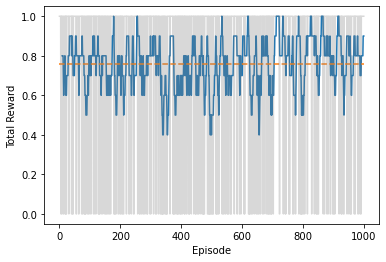

In [298]:
rewards = [run_episode(lake_env, qtable=qtable).reward for _ in range(1000)]
print('Average reward: {}'.format(np.mean((rewards))))

plot_rewards(rewards)


In [299]:
df_results.loc[len(df_results)+1] = ['alpha=0.3/gamma=0.85/epsilon_decay=0.2/epsilon_min=0.00001', epsilon_min, np.mean(rewards)]#

In [301]:
df_results

,variable,value,Average reward
1,alpha,0.600000,0.408
2,alpha,0.500000,0.520
3,alpha,0.400000,0.738
4,alpha,0.300000,0.756
5,alpha,0.200000,0.507
6,gamma /alpha=0.3,0.900000,0.738
7,gamma /alpha=0.3,0.950000,0.527
8,gamma /alpha=0.3,0.850000,0.747
9,gamma /alpha=0.3,0.800000,0.744
10,epsilon_decay /alpha=0.3/ gamma=0.85,0.200000,0.759
